https://csr.lanl.gov/data/2017.html


https://csr.lanl.gov/data-fence/1571548765/1fcFh-bNWqPJuUSQe72Z9N_Nw28=/unified-host-network-dataset-2017/netflow.html

Compressed, netflow_day-02.bz2 is 1100MB

Extracts to 6.7GB; that's 115,949,436 lines

In [1]:
import pandas
print('pandas',pandas.__version__)
import networkx
print('networkx',networkx.__version__)
from networkx import nx
from matplotlib import pyplot as plt
import time
import pickle

pandas 0.24.2
networkx 2.3


# Load data

* Time: The start time of the event in epoch time format
* Duration: The duration of the event in seconds.
* SrcDevice: The device that likely initiated the event.
* DstDevice: The receiving device.
* Protocol: The protocol number.
* SrcPort: The port used by the SrcDevice.
* DstPort: The port used by the DstDevice.
* SrcPackets: The number of packets the SrcDevice sent during the event.
* DstPackets: The number of packets the DstDevice sent during the event.
* SrcBytes: The number of bytes the SrcDevice sent during the event.
* DstBytes: The number of bytes the DstDevice sent during the event.

nfdf.to_pickle("netflow_day_02_1E6rows.pkl")

In [2]:
start_time = time.time()
nfdf = pandas.read_pickle('netflow_day_02_1E6rows.pkl')
print('elapsed',round(time.time()-start_time,2),'seconds')

elapsed 1.78 seconds


# Exploration, Characterization

In [3]:
nfdf.shape

(1000000, 11)

In [4]:
nfdf.head()

,Time,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


# visualize using Networkx

Here I provide code to visualize a graph

https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html#networkx.convert_matrix.from_pandas_edgelist

In [5]:
try:
    G.clear()
except NameError:
    pass

The following line allows you to select the number of rows used in the graph

In [6]:
G = nx.from_pandas_edgelist(nfdf[0:10],'SrcDevice','DstDevice','Duration')

In [7]:
G.number_of_nodes()

6

### no labels

C:\Users\Tristan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


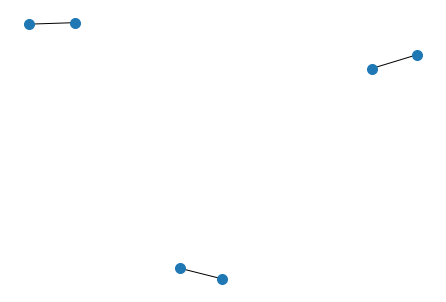

In [8]:
nx.draw(G, with_labels = False, node_size = 100)
plt.show()

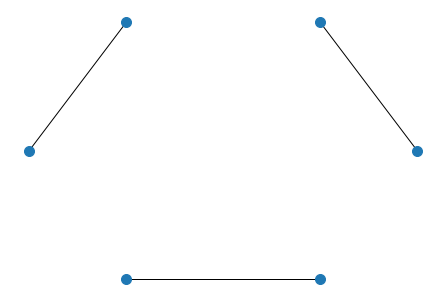

In [9]:
nx.draw(G, with_labels=False,node_size=100,pos = nx.circular_layout(G))
plt.show()

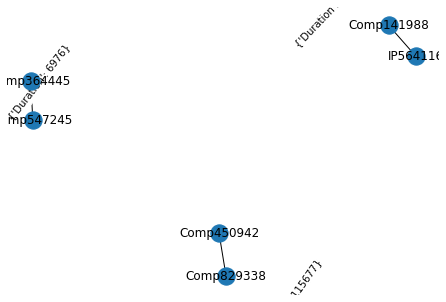

In [10]:
pos = nx.spring_layout(G)
nx.draw(G,with_labels=True)
nx.draw_networkx_edge_labels(G,pos=pos,with_labels=True)
_=plt.axis('off')

# TASK: what number of nodes makes the visualization unreadable?

You have a dataframe with 1,000,000 rows. 

First, design your experiments. What number of rows will you explore to address the question?

At what point does node and/or edge labeling provide value?<br><br>
<strong>Student Answer/Observation</strong>:<br> From running two different types of graph layouts and increasing the size of the plot for a range of rows, I have found that the number of rows above 1000 tend to make the graph unreadable. At 1000 rows, I'm still able to distinguish each separate node while at the same time identify a pattern. 
<br><br>
In my opinion, 50 rows and below is where I see node labeling providing value. Rows above this amount tend to make this particular data set harder to read.  

In [92]:
G = nx.from_pandas_edgelist(nfdf[0:1000],'SrcDevice','DstDevice','Duration')

In [93]:
G.number_of_nodes()

229

___
https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#fn:averagedegree
<br><br>
Use the info function to output: 1) name of graph, 2) its type, 3) number of nodes, 4) number of edges, 5) and the average degree in the network.<br>
Average degree is the average number of connections of each node in your network.
___

In [94]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 229
Number of edges: 184
Average degree:   1.6070


___
<strong>Graph Layout</strong><br>
circular_layout -> Position nodes on a circle.<br>
shell_layout -> Position nodes in concentric circles.<br>
spring_layout -> Position nodes using Fruchterman-Reingold force-directed algorithm.<br>
___

Circular Layout based on 1000 Rows

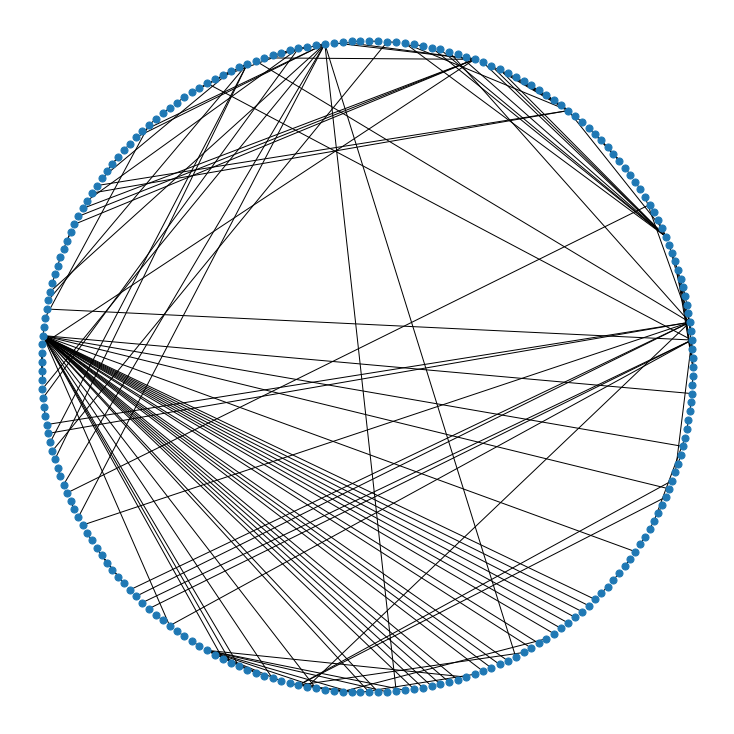

In [95]:
plt.figure(3,figsize=(10,10)) 

nx.draw(G, with_labels=False,node_size=50,pos = nx.circular_layout(G))
plt.show()

Spring Layout based on 1000 Rows

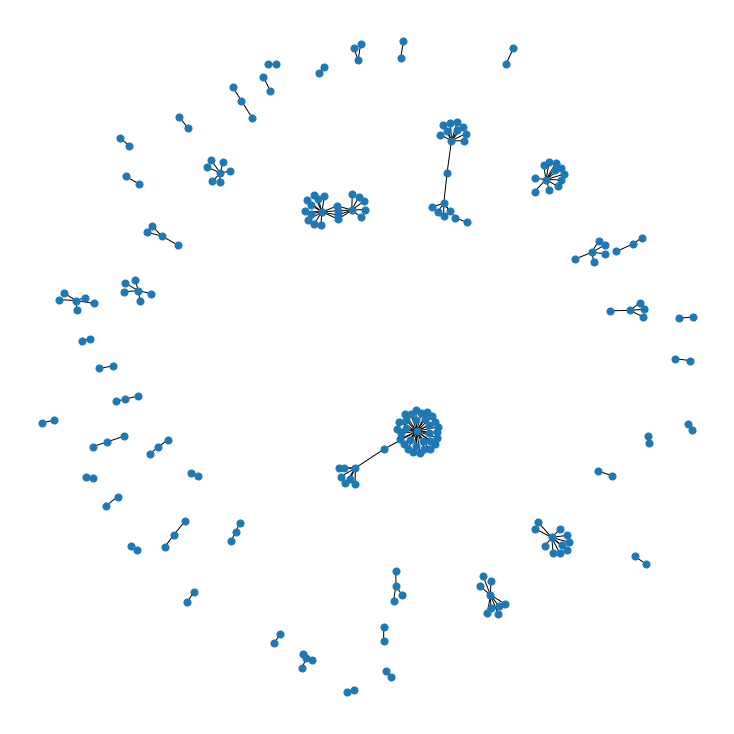

In [96]:
plt.figure(3,figsize=(10,10)) 

nx.draw(G, with_labels=False,node_size=50,pos = nx.spring_layout(G))
plt.show()

___

In [103]:
G = nx.from_pandas_edgelist(nfdf[0:50],'SrcDevice','DstDevice','Duration')

In [104]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 13
Number of edges: 9
Average degree:   1.3846


___
Circular Layout based on 50 Rows with node labels

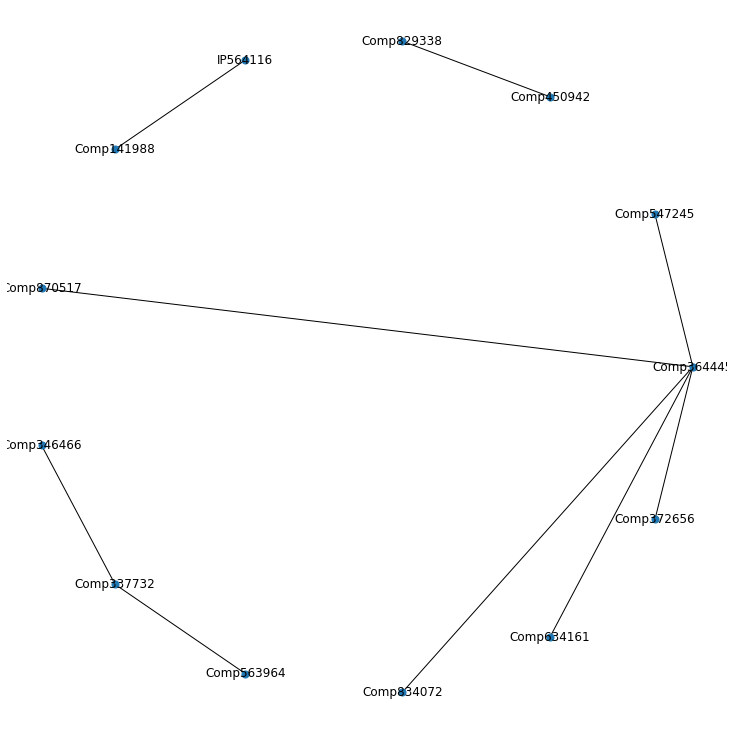

In [109]:
plt.figure(3,figsize=(10,10)) 

nx.draw(G, with_labels=True,node_size=50,pos = nx.circular_layout(G))
plt.show()

Spring Layout based on 50 Rows with node labels

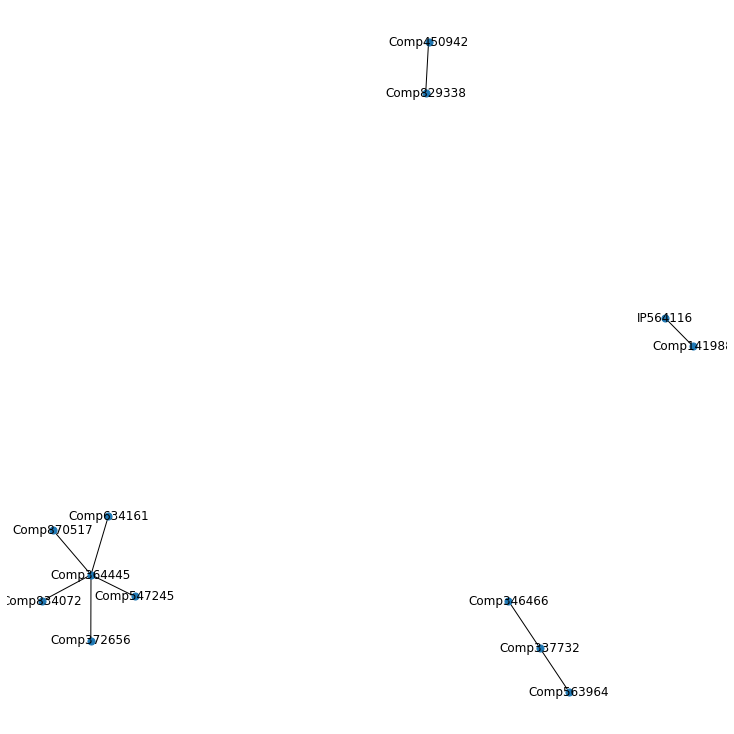

In [106]:
plt.figure(3,figsize=(10,10)) 

nx.draw(G, with_labels=True,node_size=50,pos = nx.spring_layout(G))
plt.show()